# Multi-class Classification

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import unittests

In [3]:
TRAIN_DIR = 'data/train/'
VALIDATION_DIR = 'data/validation/'

Let's explore the `./data` folder containing the images. There is a subdirectory for each class. In this case there will be 24 folders one for each letter in the alphabet, except for letters J and Z. Because of gesture motions these two letters can't be represented by an image, and are thus not included on the dataset.

The complete tree looks like this:

```
.└── data/
    ├── train/
    |    ├── A/
    |    │   ├── a1.jpg
    |    │   ├── a2.jpg
    |    │   └── ...
    |    ├── B/
    |        ├── b1.jpg
    |        ├── b2.jpg
    |        └── ...
    |    ├── ...
    |    ├── I/
    |    |    ├── i1.jpg
    |    |    ├── i2.jpg
    |    |    └── ...
    |    ├── K/
    |    |    ├── k1.jpg
    |    |    ├── k2.jpg
    |    |    └── ...
    |    ├── ...
    |    └── Y/
    |        ├── y1.jpg
    |        ├── y2.jpg
    |        └── ...
    └── validation/
         ├── A/
         │   ├── a1.jpg
         │   ├── a2.jpg
         │   └── ...
         ├── B/
         |   ├── b1.jpg
         |   ├── b2.jpg
         |   └── ...
         ├── ...
         ├── I/
         |    ├── i1.jpg
         |    ├── i2.jpg
         |    └── ...
         ├── K/
         |    ├── k1.jpg
         |    ├── k2.jpg
         |    └── ...
         ├── ...
         └── Y/
             ├── y1.jpg
             ├── y2.jpg
             └── ...
```

Let's take a look at what the images look like.

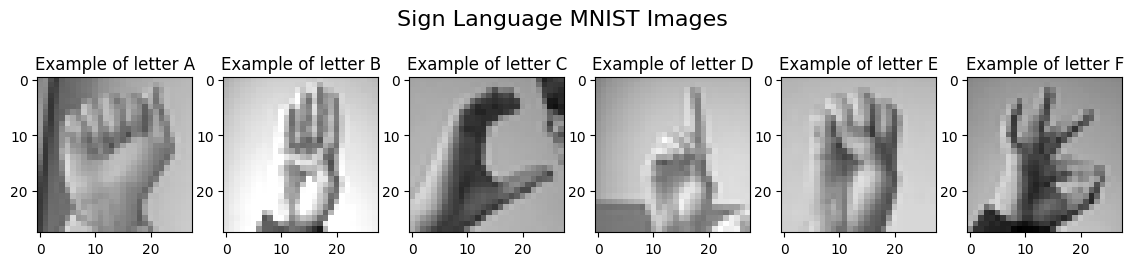

In [4]:
fig, axes = plt.subplots(1, 6, figsize=(14, 3))
fig.suptitle('Sign Language MNIST Images', fontsize=16)

# Plot one image from the first 4 letters
for ii, letter in enumerate(['A' , 'B', 'C', 'D', 'E', 'F']):
    dir = f'./data/train/{letter}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example of letter {letter}')

By plotting the images with `matplotlib` you can readily see images have a resolution of 28x28 (look at the image axes) and are in greyscale, but you can double check this by using the code below:

In [5]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (28, 28, 3)


Don't worry about the last dimension. That is because the [`img_to_array`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array) function returns a 3D array. You can easily check that actually it has repeated the same values in each dimension, for example, take a look at the first 5 columns of the image. All you really care about is that your image is 28x28 pixels. 

In [6]:
sample_array[0,:5]

array([[136., 136., 136.],
       [139., 139., 139.],
       [140., 140., 140.],
       [141., 141., 141.],
       [144., 144., 144.]], dtype=float32)

## Creating the datasets for the CNN

### Exercise 1: train_val_datasets

Your first task is to code the function that will create the datasets that will yield batches of images, both for training and validation. For this complete the `train_val_datasets` function below.

For grading purposes, make sure to use a **batch size of 32**. 

In [7]:
# GRADED FUNCTION: train_val_datasets
def train_val_datasets():
    """Create train and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): train and validation datasets
    """
    ### START CODE HERE ###
    train_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(28,28),
		label_mode="categorical",
        color_mode = "grayscale", # Use this argument to get just one color dimension, because it is greyscale 
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(28,28),
		label_mode="categorical",
        color_mode = "grayscale", # Use this argument to get just one color dimension, because it imgs are greyscale 
    ) 
    ### END CODE HERE ###
    
    return train_dataset, validation_dataset

In [8]:
# Create train and validation datasets
train_dataset, validation_dataset = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")   

Found 27455 files belonging to 24 classes.
Found 7173 files belonging to 24 classes.
Images of train dataset have shape: (None, 28, 28, 1)
Labels of train dataset have shape: (None, 24)
Images of validation dataset have shape: (None, 28, 28, 1)
Labels of validation dataset have shape: (None, 24)


**Expected Output:**
```
Found 27455 files belonging to 24 classes.
Found 7173 files belonging to 24 classes.
Images of train dataset have shape: (None, 28, 28, 1)
Labels of train dataset have shape: (None, 24)
Images of validation dataset have shape: (None, 28, 28, 1)
Labels of validation dataset have shape: (None, 24)
```

In [9]:
# Test your function
unittests.test_train_val_datasets(train_val_datasets)

 All tests passed!


## Coding the CNN

### Exercise : create_model

One last step before training is to define the architecture of the model that will be trained.

Complete the `create_model` function below. This function should return a Keras' model that uses the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) API.

A couple of things to keep in mind when defining the architecture:

- Start the model with an [`Input`](https://www.tensorflow.org/api_docs/python/tf/keras/Input) followed by a layer that rescales your images so that each pixel has values between 0 and 1 
  
- There different ways to implement the output layer, however, we expect the last layer of your model to have a number of units that corresponds to the number of possible categories, as well as the correct activation function.

- Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is suitable for multi-class classification. Remember to also define suitable `metric` to monitor.

**Note that you should use no more than 2 Conv2D and 2 MaxPooling2D layers to achieve the desired performance. You can also add dropout layers to improve training**

In [42]:
# GRADED FUNCTION: create_model
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """
    ### START CODE HERE ###      
    
    model = tf.keras.models.Sequential([
        
        # Input layer for 28x28 images with 1 channel (grayscale)
        tf.keras.Input(shape=(28, 28, 1)),
        
        # Rescale images so that pixel values are between 0 and 1
        tf.keras.layers.Rescaling(1./255),
        
        # First Conv2D layer with 32 filters, kernel size of 3x3, and ReLU activation
        tf.keras.layers.Conv2D(24, (3, 3), activation='relu'),
        # First MaxPooling2D layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Second Conv2D layer with 64 filters, kernel size of 3x3, and ReLU activation
        tf.keras.layers.Conv2D(24, (3, 3), activation='relu'),
        # Second MaxPooling2D layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten the 2D output to feed into fully connected (dense) layers
        tf.keras.layers.Flatten(),
        
        # Dense layer with 32 units and ReLU activation
        tf.keras.layers.Dense(24, activation='relu'),
        
        # Add a dropout layer to reduce overfitting
        tf.keras.layers.Dropout(0.2),
        
        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(24, activation='softmax')
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
        metrics=['accuracy']  # Track accuracy during training
    )
    
    return model

The next cell allows you to check the number of total and trainable parameters of your model and prompts a warning in case these exceeds those of a reference solution, this serves the following 3 purposes listed in order of priority:

- Helps you prevent crashing the kernel during training.

- Helps you avoid longer-than-necessary training times.
- Provides a reasonable estimate of the size of your model. In general you will usually prefer smaller models given that they accomplish their goal successfully.


**Notice that this is just informative** and may be very well below the actual limit for size of the model necessary to crash the kernel. So even if you exceed this reference you are probably fine. However, **if the kernel crashes during training or it is taking a very long time and your model is larger than the reference, come back here and try to get the number of parameters closer to the reference.**

In [43]:
# Create your model
model = create_model()

# Check parameter count against a reference solution
unittests.parameter_count(model)

Your model has 20,472 total parameters and the reference is 30,000. You are good to go!

Your model has 20,472 trainable parameters and the reference is 30,000. You are good to go!


Check that the input and output shape of your model are correct

In [44]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 28, 28, 1)
Output shape: (None, 24)


Expected output:

```
Input shape: (None, 28, 28, 1)
Output shape: (None, 24)
```

Using the `summary` method you can visulize the model you just defined.

In [45]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_16 (Rescaling)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 24)     │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 11, 11, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 5, 5, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 24)             │        14,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 24)             │           600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,472 (79.97 KB)

 Trainable params: 20,472 (79.97 KB)

 Non-trainable params: 0 (0.00 B)


Check that the architecture you used is compatible with the dataset (you can ignore the warnings prompted by using the GPU):

In [46]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels
	
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

I0000 00:00:1727542440.495289     390 service.cc:145] XLA service 0x7f1188003390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727542440.495371     390 service.cc:153]   StreamExecutor device (0): NVIDIA A10G, Compute Capability 8.6
I0000 00:00:1727542441.807899     390 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


predictions have shape: (32, 24)


**Expected output:**

```
predictions have shape: (32, 24)
```

In [47]:
# Test your function
unittests.test_create_model(create_model)

 All tests passed!


Finally, you can go ahead and train your model

In [48]:
# Train your model
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.2529 - loss: 2.4672 - val_accuracy: 0.7468 - val_loss: 0.8430
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7214 - loss: 0.8332 - val_accuracy: 0.8242 - val_loss: 0.5955
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8125 - loss: 0.5503 - val_accuracy: 0.8517 - val_loss: 0.5625
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8577 - loss: 0.4141 - val_accuracy: 0.8542 - val_loss: 0.5439
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8823 - loss: 0.3387 - val_accuracy: 0.8621 - val_loss: 0.5508
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8975 - loss: 0.2939 - val_accuracy: 0.8676 - val_loss: 0.6210
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9086 - loss: 0.2615 - val_accuracy: 0.8795 - val_loss: 0.5897
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9184 - loss: 0.2318 - val_accuracy: 

Now take a look at your training history:

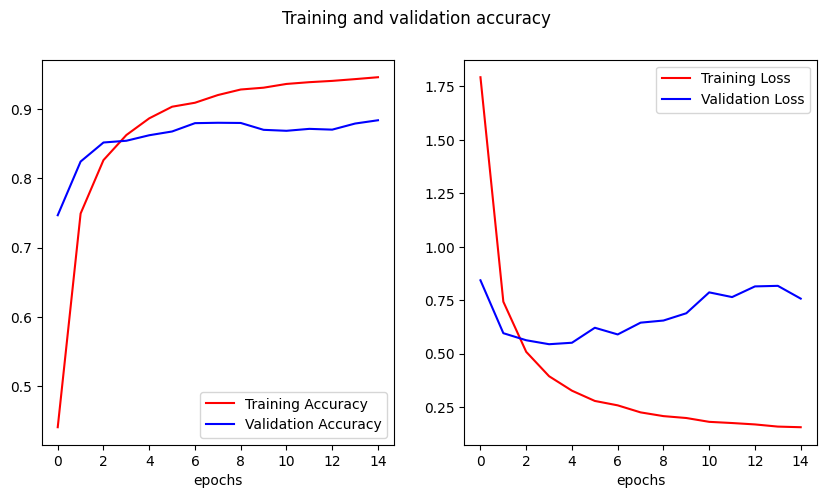

In [49]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()